In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
df= pd.read_csv('Amazon.csv')
df.head(5)


/var/folders/n3/wq3qj7vn3c12xjhrsq0nrmcr0000gn/T/ipykernel_2977/490080976.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Amazon.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
df.info() #orderID to int, date to date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [5]:
df.shape

(128975, 24)

In [6]:
df.duplicated().sum()

0

In [7]:
print(df['Style'].unique())
print(df['Unnamed: 22'].unique())
print(df['currency'].unique())
print(df['ship-country'].unique())
print(df['ASIN'].unique())


['SET389' 'JNE3781' 'JNE3371' ... 'SET066' 'J0286' 'SET045']
[nan False]
['INR' nan]
['IN' nan]
['B09KXVBD7Z' 'B09K3WFS32' 'B07WV4JV4D' ... 'B081X6MVKK' 'B0943HSR64'
 'B07N81TFNY']


# -------------------------------DATA CLEANING-----------------------------

1.Removed unwanted Columns- index, Style, Unnamed: 22, currency, ship-country, ASIN

2.Renamed Columns Name

3.Changed all values of Ship_city and Ship_state to upper case, since some of the same value is in lower case

4.Some of the value has (.) at the end of Ship_city and Ship_state columns so removed them

5.Filled null values with zero, unkown values and so on, depening on column

6.Converted Date column to Date data type

7.Created 3 new columns: Year, Month, Week_day

8.Converted Amount form INR to USD value

9.Created revenue column

In [8]:
df= df.drop(columns={'index','Style','Unnamed: 22','currency','ship-country','ASIN',})

In [9]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'SKU', 'Category', 'Size', 'Courier Status',
       'Qty', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'promotion-ids', 'B2B', 'fulfilled-by'],
      dtype='object')

In [10]:
df= df.rename(columns={'Order ID':'Order_id','Sales Channel ': 'Sales_channel','ship-service-level':'Service_type',
                      'Courier Status':'Courier_status','ship-city':'Ship_city',
                     'ship-state': 'Ship_state', 'ship-postal-code':'Ship_postal_code',
                    'promotion-ids': 'Promotions',
                     'fulfilled-by': 'Fulfilled_by','Amount':'Amount($)' })

In [11]:
df.head(5)

,Order_id,Date,Status,Fulfilment,Sales_channel,Service_type,SKU,Category,Size,Courier_status,Qty,Amount($),Ship_city,Ship_state,Ship_postal_code,Promotions,B2B,Fulfilled_by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389-KR-NP-S,Set,S,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371-KR-XL,kurta,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341-DR-L,Western Dress,L,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671-TU-XXXL,Top,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False,NaN


In [12]:
df.isnull().sum()

Order_id                0
Date                    0
Status                  0
Fulfilment              0
Sales_channel           0
Service_type            0
SKU                     0
Category                0
Size                    0
Courier_status       6872
Qty                     0
Amount($)            7795
Ship_city              33
Ship_state             33
Ship_postal_code       33
Promotions          49153
B2B                     0
Fulfilled_by        89698
dtype: int64

In [13]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [14]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [15]:
df['Sales_channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [16]:
df['Service_type'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [17]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [18]:
df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'Free'], dtype=object)

In [19]:
df['Courier_status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [20]:
#changing all values to upper case, since some of the same value is in lower case
##some of the value has (.) at the end. removing them
df['Ship_city'].nunique()


8955

In [21]:
df['Ship_city']= df['Ship_city'].str.upper()

In [22]:
df['Ship_city']= df['Ship_city'].str.strip('.')

In [23]:
df['Ship_city'].nunique()

7274

In [24]:
df['Ship_state'].nunique()

69

In [25]:
df['Ship_state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [26]:
#changing all values to upper case, since some of the same value is in lower case
df['Ship_state']= df['Ship_state'].str.upper()

In [27]:
df['Ship_state'].nunique()

47

In [28]:
df['Fulfilled_by'].unique()

array(['Easy Ship', nan], dtype=object)

In [29]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 128975 entries, 0 to 128974
Series name: Date
Non-Null Count   Dtype 
--------------   ----- 
128975 non-null  object
dtypes: object(1)
memory usage: 1007.7+ KB


In [30]:
#df['Amount($)']= round(df['Amount($)'],2)

In [31]:
#filling nan values
df['Amount($)'].fillna(0,inplace=True)
df['Courier_status'].fillna('Unkown',inplace=True)
df['Ship_city'].fillna('Unkown',inplace=True)
df['Ship_state'].fillna('Unkown',inplace=True)
df['Promotions'].fillna('No Promotion',inplace=True)
df['Fulfilled_by'].fillna('Unkown',inplace=True)
df['Ship_postal_code'].fillna(0,inplace=True)

In [32]:
df.isnull().sum()

Order_id            0
Date                0
Status              0
Fulfilment          0
Sales_channel       0
Service_type        0
SKU                 0
Category            0
Size                0
Courier_status      0
Qty                 0
Amount($)           0
Ship_city           0
Ship_state          0
Ship_postal_code    0
Promotions          0
B2B                 0
Fulfilled_by        0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_id          128975 non-null  object 
 1   Date              128975 non-null  object 
 2   Status            128975 non-null  object 
 3   Fulfilment        128975 non-null  object 
 4   Sales_channel     128975 non-null  object 
 5   Service_type      128975 non-null  object 
 6   SKU               128975 non-null  object 
 7   Category          128975 non-null  object 
 8   Size              128975 non-null  object 
 9   Courier_status    128975 non-null  object 
 10  Qty               128975 non-null  int64  
 11  Amount($)         128975 non-null  float64
 12  Ship_city         128975 non-null  object 
 13  Ship_state        128975 non-null  object 
 14  Ship_postal_code  128975 non-null  float64
 15  Promotions        128975 non-null  object 
 16  B2B               12

In [34]:
df['Date']= pd.to_datetime(df['Date'])

In [35]:
df['Year']= df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()
df['Week_name']=df['Date'].dt.day_name()

In [36]:
df.head(5)

,Order_id,Date,Status,Fulfilment,Sales_channel,Service_type,SKU,Category,Size,Courier_status,Qty,Amount($),Ship_city,Ship_state,Ship_postal_code,Promotions,B2B,Fulfilled_by,Year,Month,Week_name
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389-KR-NP-S,Set,S,Unkown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion,False,Easy Ship,2022,April,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022,April,Saturday
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371-KR-XL,kurta,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unkown,2022,April,Saturday
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341-DR-L,Western Dress,L,Unkown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,False,Easy Ship,2022,April,Saturday
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671-TU-XXXL,Top,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,No Promotion,False,Unkown,2022,April,Saturday


In [37]:
df['Month'].unique()

array(['April', 'March', 'May', 'June'], dtype=object)

In [38]:
df['Week_name'].unique()

array(['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday',
       'Sunday'], dtype=object)

In [39]:
df['Year'].unique()

array([2022])

In [40]:
df.head()

,Order_id,Date,Status,Fulfilment,Sales_channel,Service_type,SKU,Category,Size,Courier_status,Qty,Amount($),Ship_city,Ship_state,Ship_postal_code,Promotions,B2B,Fulfilled_by,Year,Month,Week_name
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389-KR-NP-S,Set,S,Unkown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion,False,Easy Ship,2022,April,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022,April,Saturday
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371-KR-XL,kurta,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unkown,2022,April,Saturday
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341-DR-L,Western Dress,L,Unkown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,False,Easy Ship,2022,April,Saturday
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671-TU-XXXL,Top,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,No Promotion,False,Unkown,2022,April,Saturday


#        ---------------------EXPLORATORY DATA ANALAYSIS----------------------

# Key Insights:


1.What is the total revenue generated over a specific time period?

-Start Date: 2022-03-31 00:00:00

-End Date: 2022-06-29 00:00:00

-Total Revenue Generated: 867306.35$



2.What are the top products by sales and quantity wise?

-By Sale Set,Kurta, Western Dress

-Set 38.8%, Kurta 38.6%, Western Dress 12.1% quantity


3.What are the total Revenue generated by each product for Each Month? 

-April: Set,Kurta, Western Dress Top Products

-May: Set(decreased compare to April), Kurta(decreased compare to April), Western Dress(Increased compare to April)

-June: Set(decreased compare to April and May), Kurta(decreased compare to April and May), Western Dress(inecreased compare to April but decreased May)


4.What is the average order value? 

-Total Quantity Ordered: 116649 

-Total Value: 904855.71

-Average Order Value (AOV) excluding zero-quantity orders: 7.76


5.What is the average order value of each item?

-set 10$, saree 9.6$, western 9.17$


6.What are the peak sales periods (day, week, month, year)?

-Peak Sales Date: 2022-05-04 00:00:00
-Peak Sales Year: 2022

-Peak Sales Month: April

-Peak Sales Week: Sunday


7.What are the top cities/states/countries for sales?
-City: BENGALURU, HYDERABAD, MUMBAI

-State: MAHARASHTRA, KARNATAKA, TELANGANA


8.Are there any trends in order cancellations?

-most orders cancelled on April

-most orders cancelled if its fulfulled by Amazon compare to marchant

-most orders cancelled by MAHARASHTRA, KARNATAKA state

-most orders cancelled on Trusday and Sunday

-most orders cancelled product set, kurta, western dress

-most orders cancelled who order M,L,XL size

-most orders cancelled who didnt use any promotion compare to promition

-most orders cancelled by B2C compare to B2B


9.What percentage of orders are fulfilled by Amazon vs Merchant?

-mostly by Amazon 69.5% where Marchant 30.5%


10.How effective are the promotions?

-orders more 74.82% with promotions and cancels more if it doesnt have promitions


11.Which promotions are most commonly used?

-IN CORE FREE shipping- 46100 times


12.Who generated most revenus?

-amazone 70.5% compare to marchant 29.5




# What is the total revenue generated over a specific time period?


In [41]:
#converting it USD from INR

df['Amount($)']= (df['Amount($)']*.012).round(2)


In [42]:
#making sure we dont calculate revenue for cancelled orders and quantity less than 1

def calculate_revenue(row):
    if row['Status'] == 'Cancelled' or row['Qty'] == 0:
        return 0
    return round(row['Qty'] * row['Amount($)'], 2)

df['Revenue']=df.apply(calculate_revenue, axis=1)


,Order_id,Date,Status,Fulfilment,Sales_channel,Service_type,SKU,Category,Size,Courier_status,Qty,Amount($),Ship_city,Ship_state,Ship_postal_code,Promotions,B2B,Fulfilled_by,Year,Month,Week_name,Revenue
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389-KR-NP-S,Set,S,Unkown,0,7.77,MUMBAI,MAHARASHTRA,400081.0,No Promotion,False,Easy Ship,2022,April,Saturday,0.00
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,4.87,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022,April,Saturday,4.87
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371-KR-XL,kurta,XL,Shipped,1,3.95,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unkown,2022,April,Saturday,3.95
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341-DR-L,Western Dress,L,Unkown,0,9.04,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,False,Easy Ship,2022,April,Saturday,0.00
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671-TU-XXXL,Top,3XL,Shipped,1,6.89,CHENNAI,TAMIL NADU,600073.0,No Promotion,False,Unkown,2022,April,Saturday,6.89


In [43]:
df[['Status','Qty','Amount($)','Revenue','Courier_status']].head(10)

,Status,Qty,Amount($),Revenue,Courier_status
0,Cancelled,0,7.77,0.00,Unkown
1,Shipped - Delivered to Buyer,1,4.87,4.87,Shipped
2,Shipped,1,3.95,3.95,Shipped
3,Cancelled,0,9.04,0.00,Unkown
4,Shipped,1,6.89,6.89,Shipped
5,Shipped,1,9.89,9.89,Shipped
6,Shipped,1,7.84,7.84,Shipped
7,Shipped - Delivered to Buyer,1,4.79,4.79,Shipped
8,Cancelled,0,0.00,0.00,Cancelled
9,Shipped,1,4.36,4.36,Shipped


In [101]:
tot_rev= df['Revenue'].sum()
start_date = df['Date'].min()
end_date = df['Date'].max()

print("Start Date:", start_date)
print("End Date:", end_date)
print('Total Revenue Generated:', round(tot_rev,2),'$' )

Start Date: 2022-03-31 00:00:00
End Date: 2022-06-29 00:00:00
Total Revenue Generated: 867306.35 $


# What are the top products by sales?

In [45]:
top_pro=df.groupby(['Category'],as_index=False)['Revenue'].sum().sort_values(by='Revenue', ascending= False)
top_pro.head(5)

,Category,Revenue
5,Set,431901.63
8,kurta,235642.38
7,Western Dress,123461.70
6,Top,59258.77
3,Ethnic Dress,8820.55


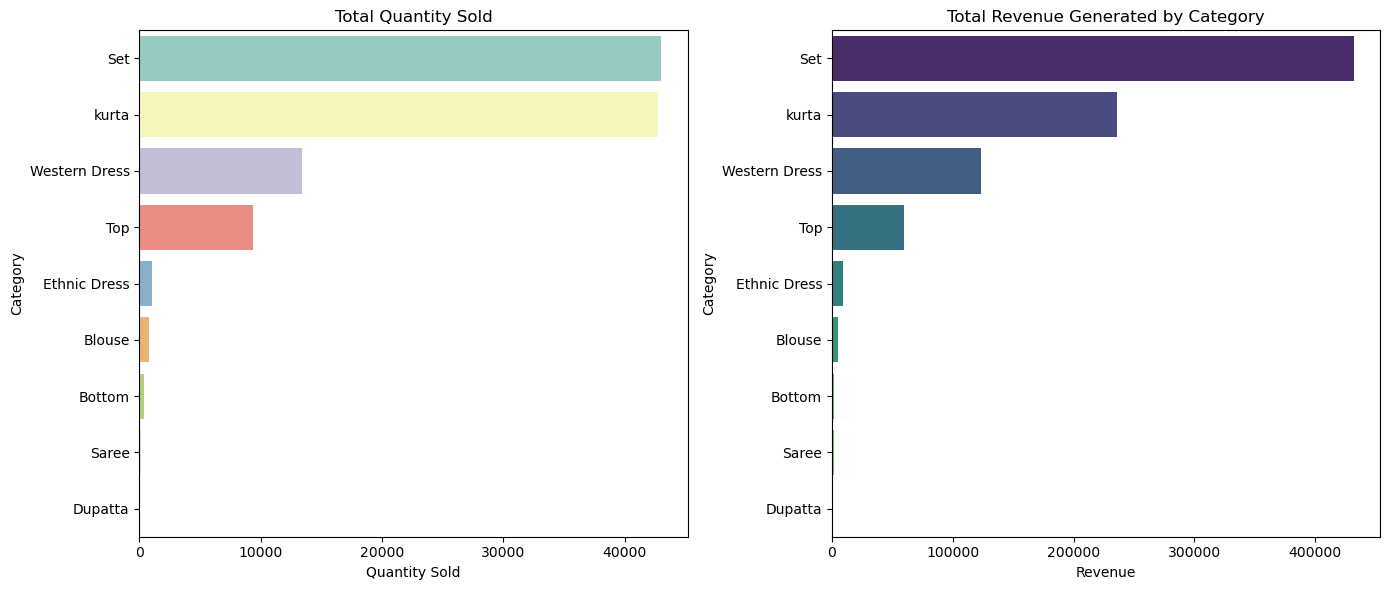

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.barplot(x='Revenue', y='Category', data=top_pro,ax=axes[1], palette='viridis')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Category')
axes[1].set_title('Total Revenue Generated by Category')


sns.barplot(x='Qty', y='Category', ax=axes[0], data=qu_pro)
axes[0].set_xlabel('Quantity Sold')
axes[0].set_ylabel('Category')
axes[0].set_title('Total Quantity Sold')
plt.tight_layout()





# What are the total Revenue generated by each product for Each Month

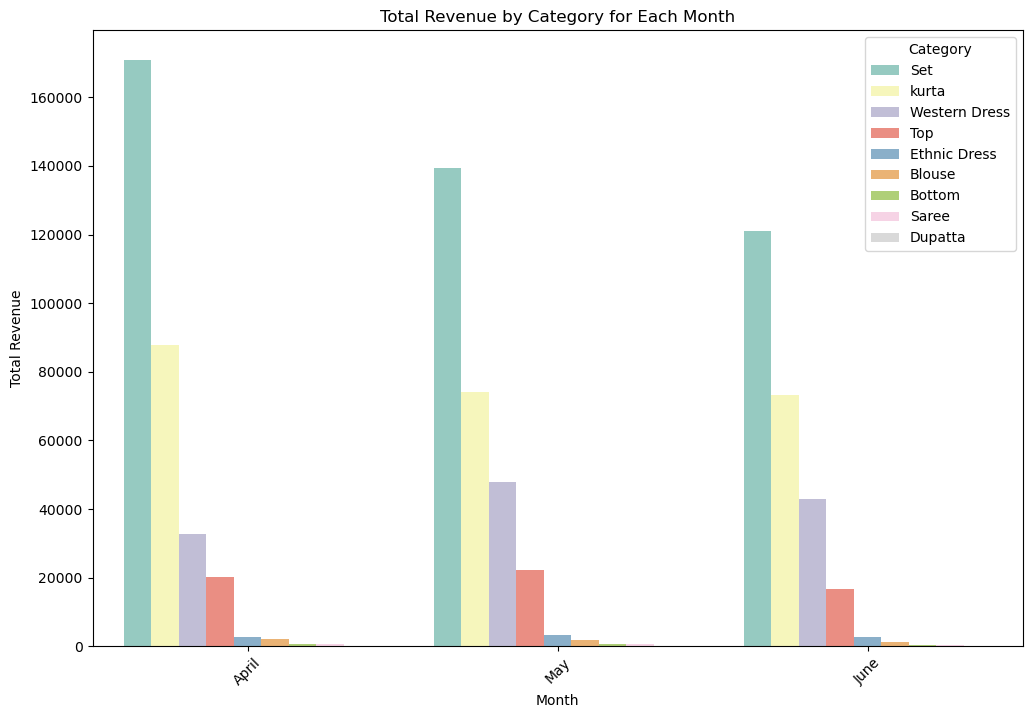

In [141]:
grouped = df.groupby(['Month', 'Category'], as_index=False)['Revenue'].sum()
sorted_df = grouped.sort_values(by=['Month', 'Revenue'], ascending=[True, False])

month_order = [ 'April', 'May', 'June']

plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Revenue', hue='Category', data=sorted_df,  errcolor='0', order=month_order)
plt.title('Total Revenue by Category for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Category', loc='upper right')
plt.show()

# What are the top products Quantity wise?

In [48]:
qty_ov= df[(df['Status'] != 'Cancelled')]
qu_pro= qty_ov.groupby(['Category'],as_index=False)['Qty'].sum().sort_values(by='Qty', ascending= False)
qu_pro

,Category,Qty
5,Set,43033
8,kurta,42792
7,Western Dress,13418
6,Top,9368
3,Ethnic Dress,1016
0,Blouse,831
1,Bottom,384
4,Saree,147
2,Dupatta,3


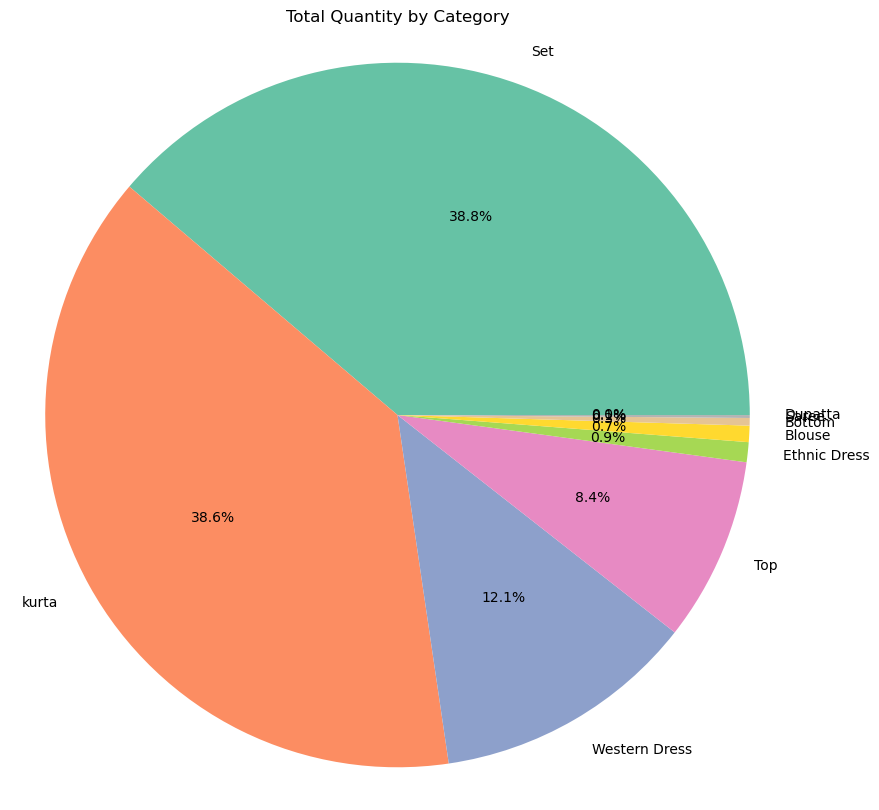

In [112]:
plt.figure(figsize=(10, 10))  
plt.pie(qu_pro['Qty'], labels=qu_pro['Category'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Total Quantity by Category')
plt.axis('equal')  
plt.show()

# What is the average order value?

In [117]:
# Filter rows where quantity is greater than zero or the status is not 'Cancelled'
qty_over_zero= df[(df['Status'] != 'Cancelled') | (df['Qty'] != 0)]
total_qty=qty_over_zero['Qty'].sum()
total_amount=qty_over_zero['Amount($)'].sum()

print('Total Quantity Ordered:',total_qty)
print('Total Value:',round(total_amount,2))
print('Average Order Value (AOV) excluding zero-quantity orders:',round(total_amount/total_qty,2))

Total Quantity Ordered: 116649
Total Value: 904855.71
Average Order Value (AOV) excluding zero-quantity orders: 7.76


# What is the average order value of each item?

In [119]:
avg_qn= qty_over_zero.groupby(['Category'],as_index=False)['Amount($)'].mean().sort_values(by='Amount($)',ascending= False)
avg_qn

,Category,Amount($)
5,Set,10.000403
4,Saree,9.609865
7,Western Dress,9.174266
3,Ethnic Dress,8.686327
6,Top,6.323890
0,Blouse,6.204352
8,kurta,5.470426
1,Bottom,4.270990
2,Dupatta,3.660000


Text(0.5, 1.0, 'Avg Order Value Per Product')

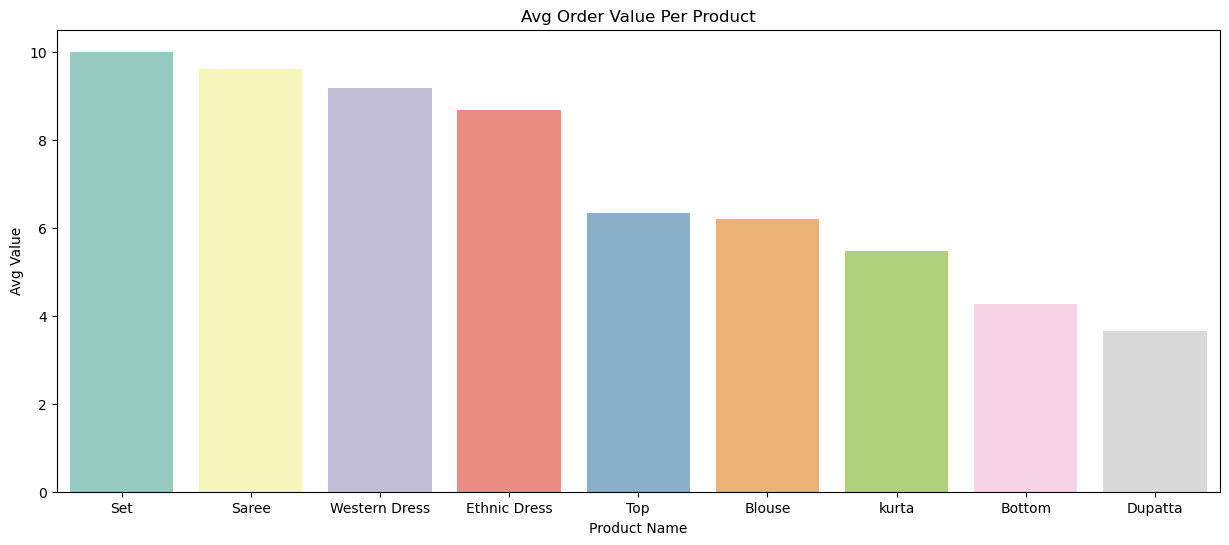

In [124]:
plt.figure(figsize=(15, 6))
sns.barplot(data=avg_qn, x='Category',y='Amount($)'  )
plt.xlabel('Product Name')
plt.ylabel('Avg Value')
plt.title('Avg Order Value Per Product')

# What are the peak sales periods (day, week, month, year)?

In [52]:
day_sales = df.groupby('Date')['Revenue'].sum()
peak_day = day_sales.idxmax()

yearly_sales = df.groupby('Year')['Revenue'].sum()
peak_year = yearly_sales.idxmax()


monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum()
peak_month = monthly_sales[peak_year].idxmax()


weekly_sales = df.groupby(['Year', 'Week_name'])['Revenue'].sum()
peak_week = weekly_sales[peak_year].idxmax()

print(f'Peak Sales Date: {peak_day}')
print(f'Peak Sales Year: {peak_year}')
print(f'Peak Sales Month: {peak_month}')
print(f'Peak Sales Week: {peak_week}')


Peak Sales Date: 2022-05-04 00:00:00
Peak Sales Year: 2022
Peak Sales Month: April
Peak Sales Week: Sunday


# Calculate AOV by Month, Week, Date

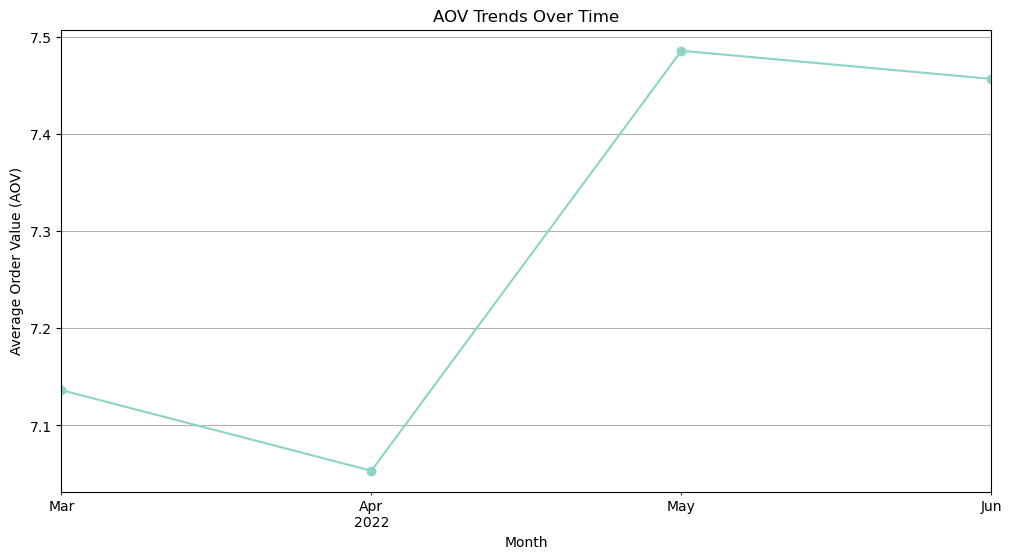

In [127]:
aov_by_month = df.groupby(df['Date'].dt.to_period("M"))['Amount($)'].mean()

plt.figure(figsize=(12, 6))
aov_by_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Order Value (AOV)')
plt.title('AOV Trends Over Time')
plt.grid(True)
plt.show()


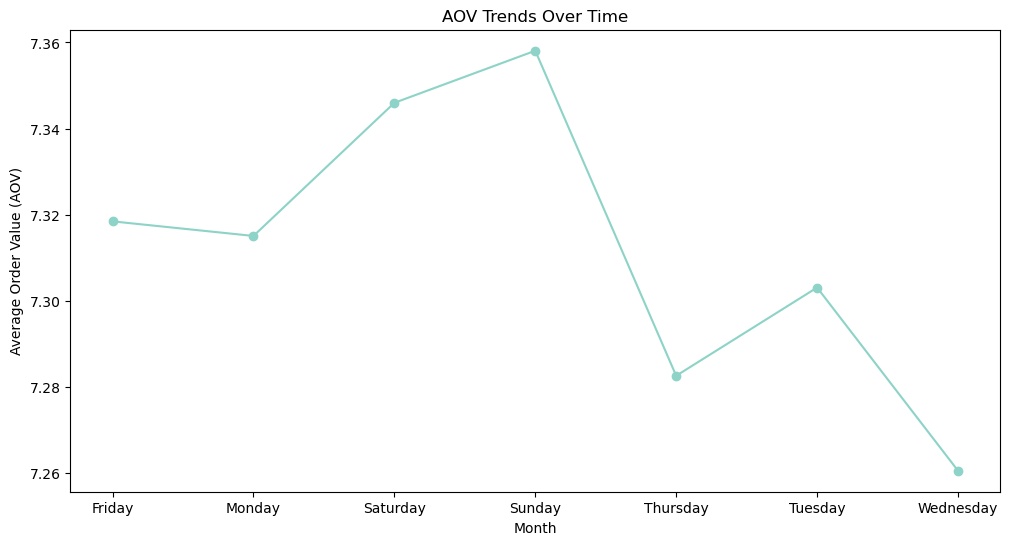

In [130]:
aov_by_month = df.groupby(df['Week_name'])['Amount($)'].mean()

plt.figure(figsize=(12, 6))
aov_by_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Order Value (AOV)')
plt.title('AOV Trends Over Time')

plt.show()


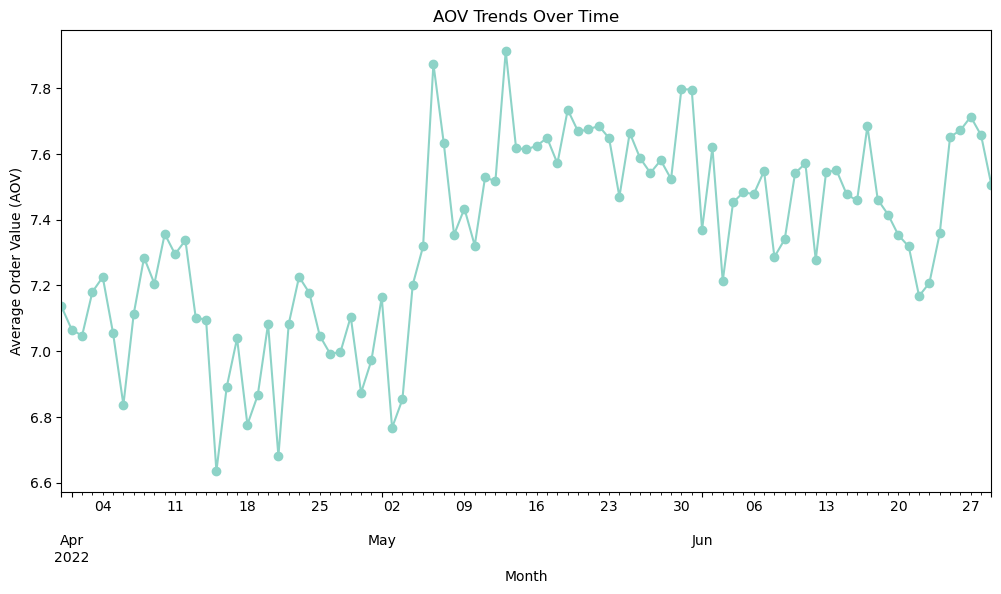

In [131]:
aov_by_month = df.groupby(df['Date'])['Amount($)'].mean()

plt.figure(figsize=(12, 6))
aov_by_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Order Value (AOV)')
plt.title('AOV Trends Over Time')

plt.show()

# What are the top cities/states/countries for sales?

In [55]:
top_city=df.groupby(['Ship_city'],as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending= False)
top_city.head()

,Ship_city,Revenue
804,BENGALURU,81208.16
2529,HYDERABAD,61513.35
4316,MUMBAI,47674.88
4736,NEW DELHI,43752.02
1306,CHENNAI,39934.63


In [56]:
top_state=df.groupby(['Ship_state'],as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending= False)
top_state.head()

,Ship_state,Revenue
22,MAHARASHTRA,147503.59
17,KARNATAKA,116610.94
42,TELANGANA,76158.63
44,UTTAR PRADESH,74977.98
41,TAMIL NADU,72390.54


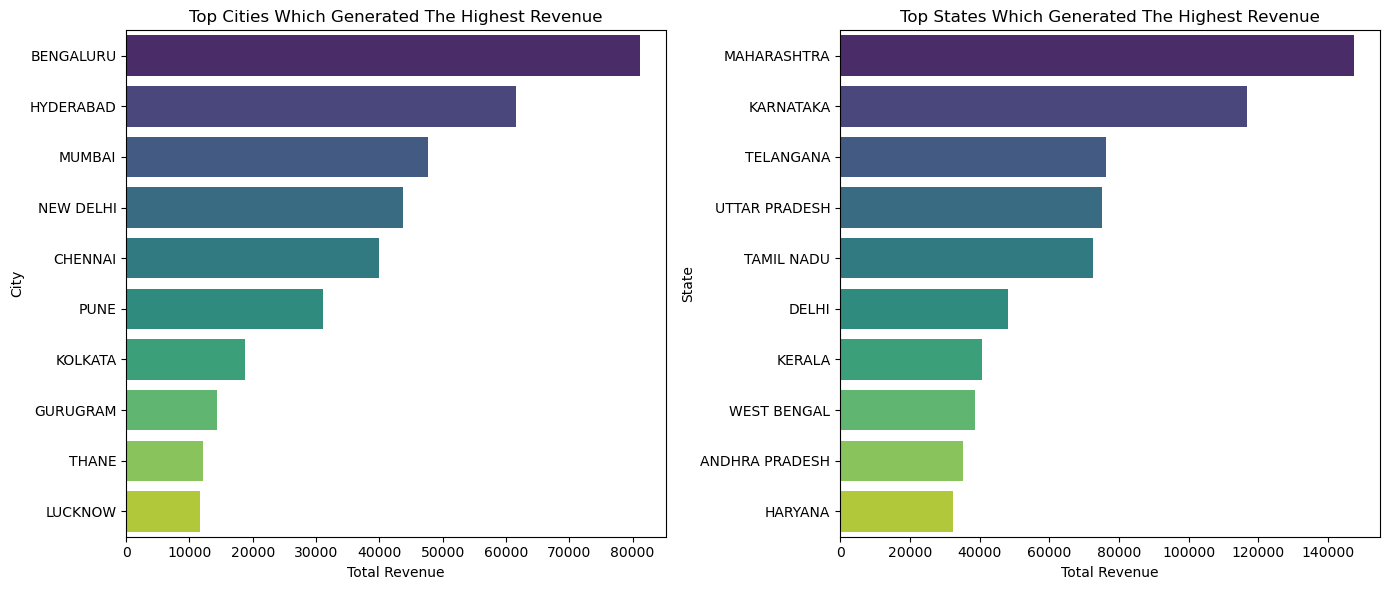

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Revenue', y='Ship_city', data=top_city.head(10), ax=axes[0], palette='viridis')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('City')
axes[0].set_title('Top Cities Which Generated The Highest Revenue')


sns.barplot(x='Revenue', y='Ship_state', data=top_state.head(10), ax=axes[1], palette='viridis')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('State')
axes[1].set_title('Top States Which Generated The Highest Revenue')
plt.tight_layout()

plt.show()

# Are there any trends in order cancellations?


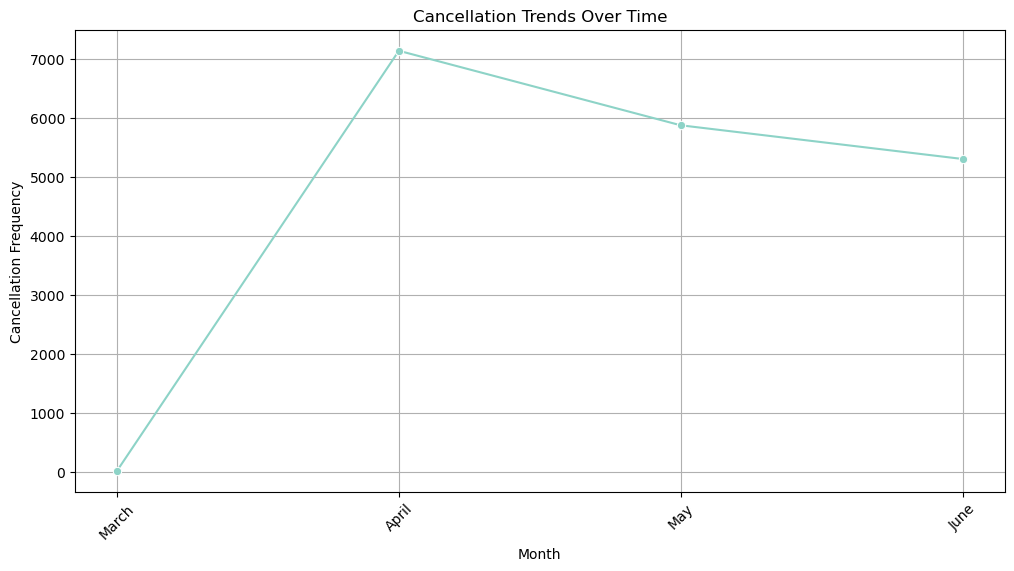

In [59]:

canceled_orders = df[df['Status'] == 'Cancelled']

custom_month_order = ['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

cancellation_by_month = canceled_orders['Month'].value_counts().reindex(custom_month_order)

plt.figure(figsize=(12, 6))
sns.lineplot(x=cancellation_by_month.index, y=cancellation_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Cancellation Frequency')
plt.title('Cancellation Trends Over Time')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()


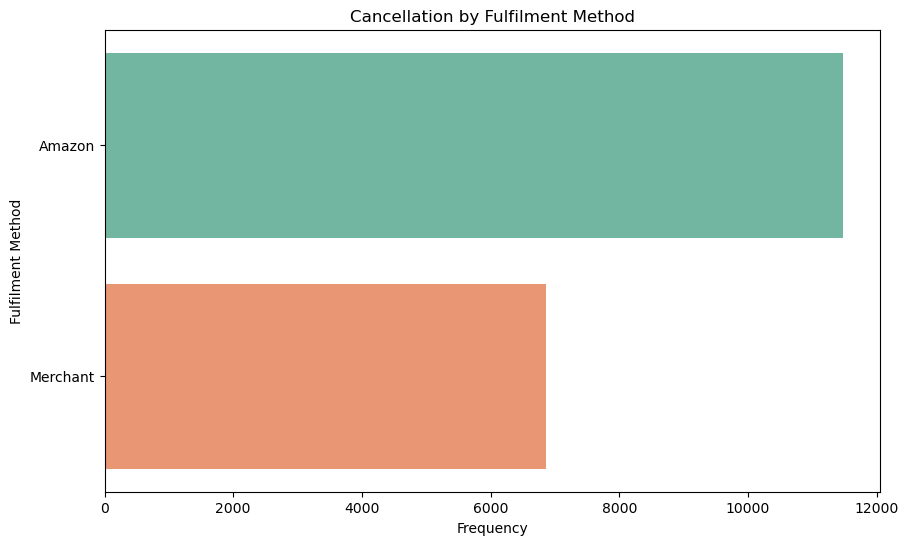

In [60]:
cancellation_by_fulfilment = canceled_orders['Fulfilment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_by_fulfilment.values, y=cancellation_by_fulfilment.index, palette='Set2')
plt.xlabel('Frequency')
plt.ylabel('Fulfilment Method')
plt.title('Cancellation by Fulfilment Method')

plt.show()


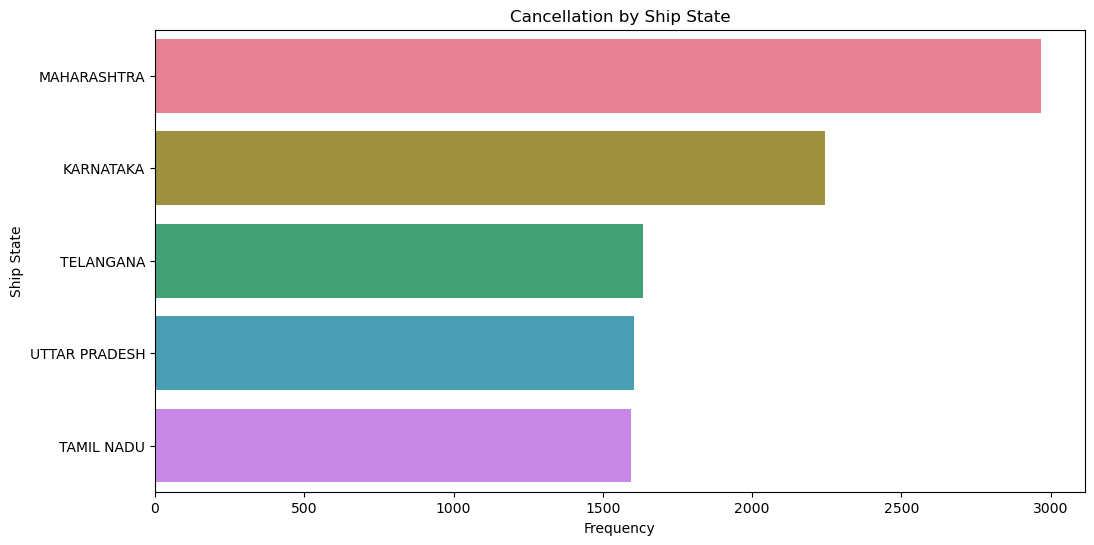

In [61]:
cancellation_by_ship_state = canceled_orders['Ship_state'].value_counts().head()
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_by_ship_state.values, y=cancellation_by_ship_state.index, palette='husl')
plt.xlabel('Frequency')
plt.ylabel('Ship State')
plt.title('Cancellation by Ship State')
plt.show()


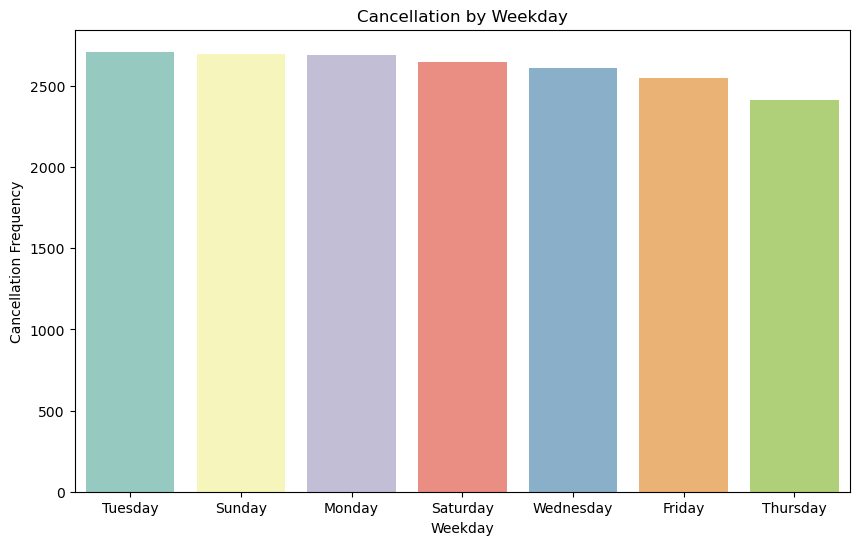

In [62]:
week= canceled_orders['Week_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(data=canceled_orders, x=week.index,y=week.values)
plt.xlabel('Weekday')
plt.ylabel('Cancellation Frequency')
plt.title('Cancellation by Weekday')
plt.show()

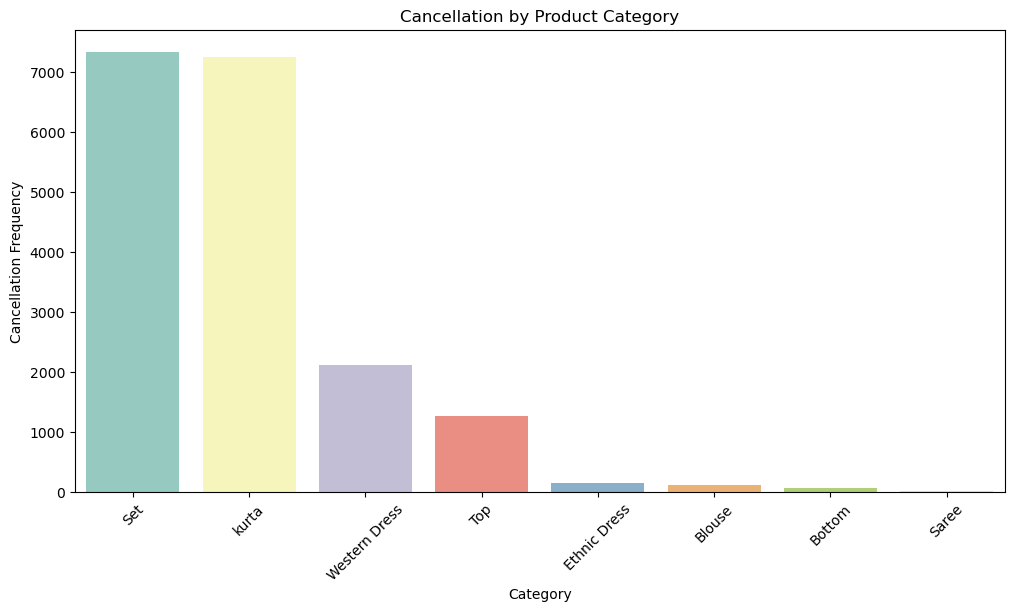

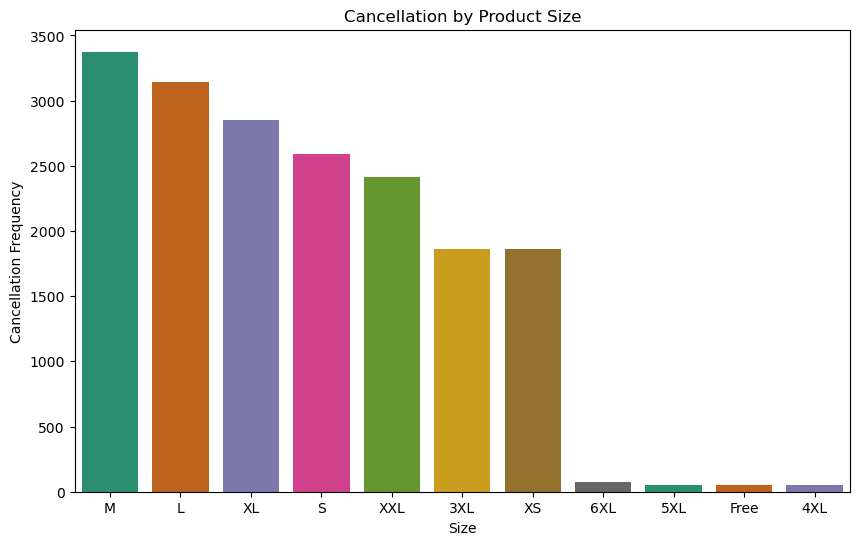

In [63]:
cancellation_by_category = canceled_orders['Category'].value_counts()
cancellation_by_size = canceled_orders['Size'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_by_category.index, y=cancellation_by_category.values, palette='Set3')
plt.xlabel('Category')
plt.ylabel('Cancellation Frequency')
plt.title('Cancellation by Product Category')
plt.xticks(rotation=45)

plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_by_size.index, y=cancellation_by_size.values, palette='Dark2')
plt.xlabel('Size')
plt.ylabel('Cancellation Frequency')
plt.title('Cancellation by Product Size')

plt.show()


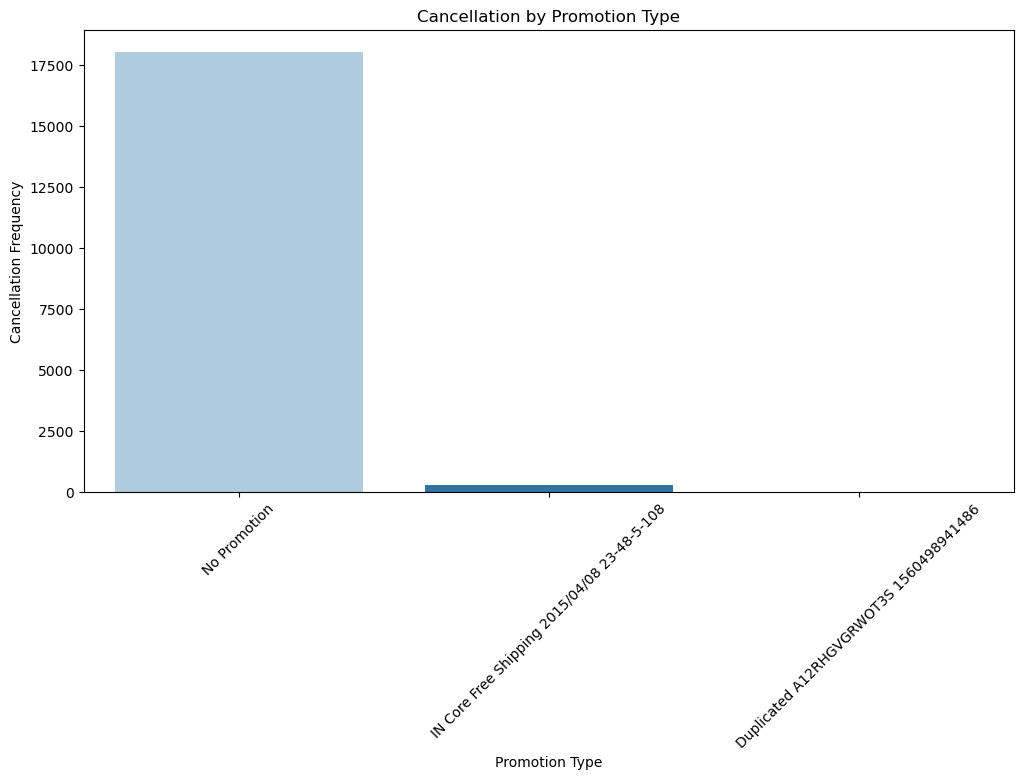

In [64]:
cancellation_by_promotion = canceled_orders['Promotions'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_by_promotion.index, y=cancellation_by_promotion.values, palette='Paired')
plt.xlabel('Promotion Type')
plt.ylabel('Cancellation Frequency')
plt.title('Cancellation by Promotion Type')
plt.xticks(rotation=45)

plt.show()


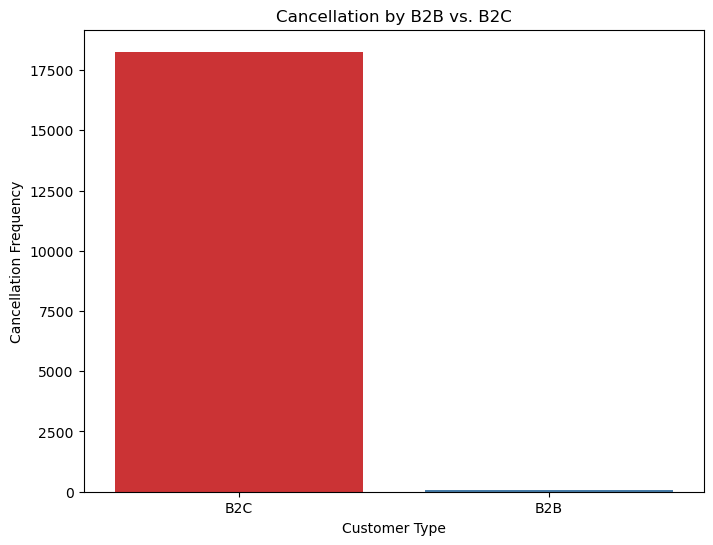

In [135]:
cancellation_by_b2b_b2c = canceled_orders['B2B'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=cancellation_by_b2b_b2c.index, y=cancellation_by_b2b_b2c.values, palette='Set1')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Frequency')
plt.title('Cancellation by B2B vs. B2C')
plt.xticks([0, 1], ['B2C', 'B2B'])

plt.show()


# What is the distribution of B2B vs B2C customers?


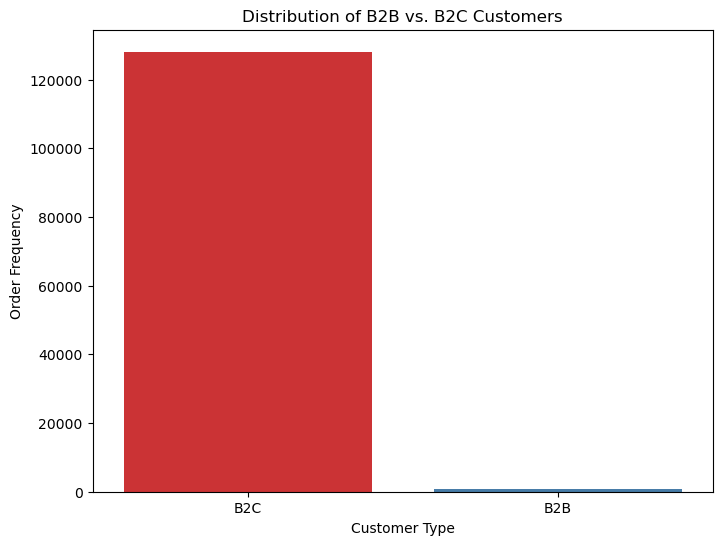

In [136]:
b2b_b2c = df['B2B'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=b2b_b2c.index, y=b2b_b2c.values, palette='Set1')
plt.xlabel('Customer Type')
plt.ylabel('Order Frequency')
plt.title('Distribution of B2B vs. B2C Customers')
plt.xticks([0, 1], ['B2C', 'B2B'])

plt.show()


# What percentage of orders are fulfilled by Amazon vs Merchant?

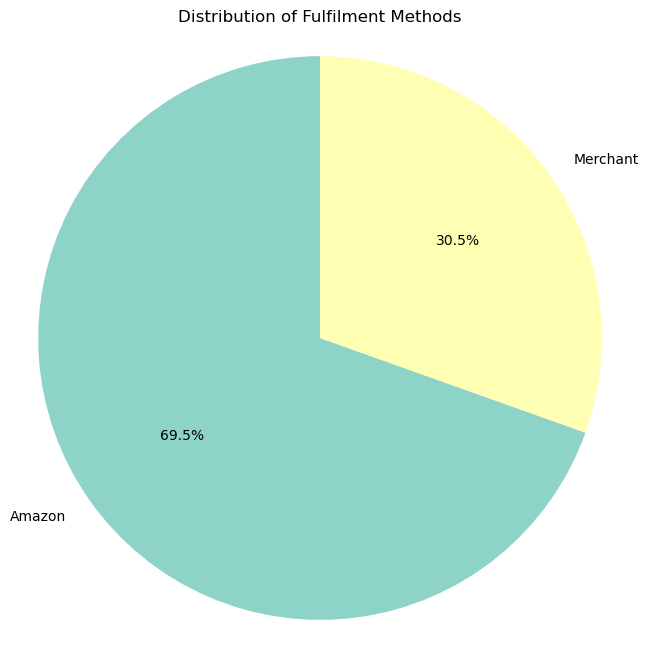

In [68]:

fulfillment_counts = df['Fulfilment'].value_counts()
labels = fulfillment_counts.index
sizes = fulfillment_counts.values


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of Fulfilment Methods')
plt.axis('equal')  

plt.show()


# How effective are the promotions?

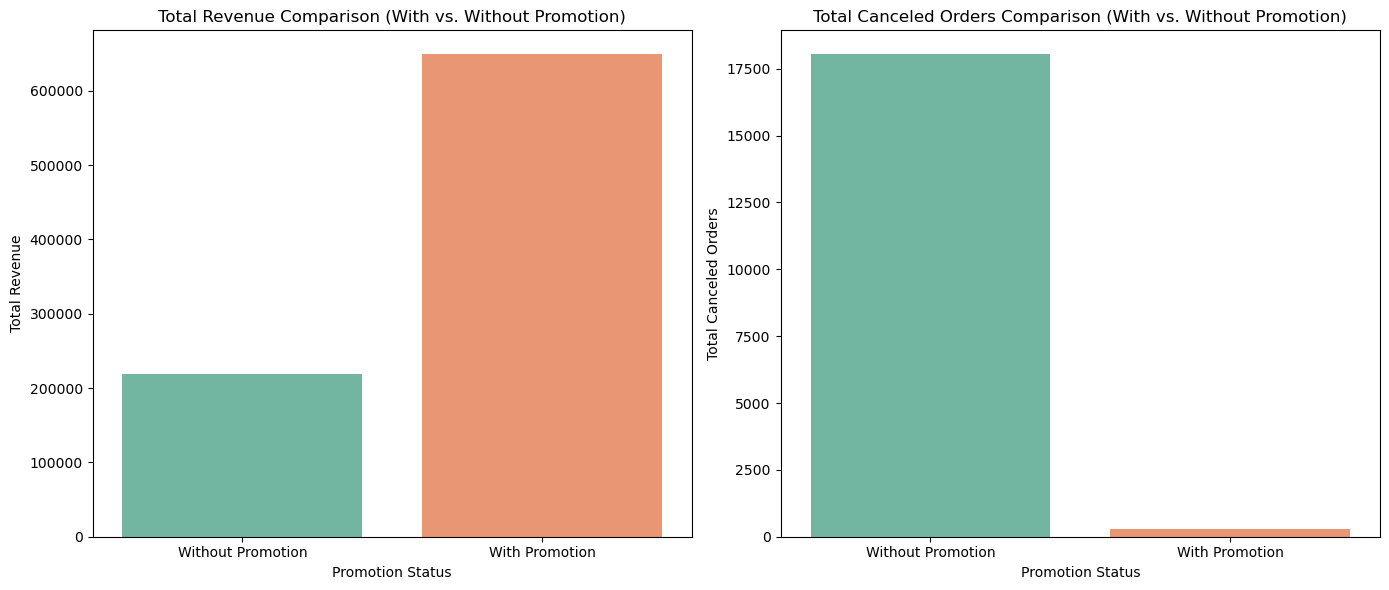

Percentage of Order Without Promostion 25.171095541961613
Percentage of Order With Promostion 74.82890445803838


In [146]:
no_prom = df[df['Promotions'] == 'No Promotion']
with_prom = df[df['Promotions'] != 'No Promotion']


total_revenue_no_prom = no_prom['Revenue'].sum()
total_revenue_with_prom = with_prom['Revenue'].sum()

total_rev = total_revenue_no_prom + total_revenue_with_prom
percentage_without_pro = (total_revenue_no_prom / total_rev) * 100
percentage_with_pro = (total_revenue_with_prom / total_rev) * 100



fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.barplot(x=['Without Promotion', 'With Promotion'], y=[total_revenue_no_prom, total_revenue_with_prom],ax=axes[0], palette='Set2')
axes[0].set_xlabel('Promotion Status')
axes[0].set_ylabel('Total Revenue')
axes[0].set_title('Total Revenue Comparison (With vs. Without Promotion)')



no_prom_can = no_prom[no_prom['Status'] == 'Cancelled']
with_prom_can = with_prom[with_prom['Status'] == 'Cancelled']
total_can_no_prom = len(no_prom_can)
total_can_with_prom = len(with_prom_can)


sns.barplot(x=['Without Promotion', 'With Promotion'], y=[total_can_no_prom, total_can_with_prom],ax=axes[1], palette='Set2')
axes[1].set_xlabel('Promotion Status')
axes[1].set_ylabel('Total Canceled Orders')
axes[1].set_title('Total Canceled Orders Comparison (With vs. Without Promotion)')
plt.tight_layout()
plt.show()

print('Percentage of Order Without Promostion',percentage_without_pro)
print('Percentage of Order With Promostion',percentage_with_pro)



# Which promotions are most commonly used?

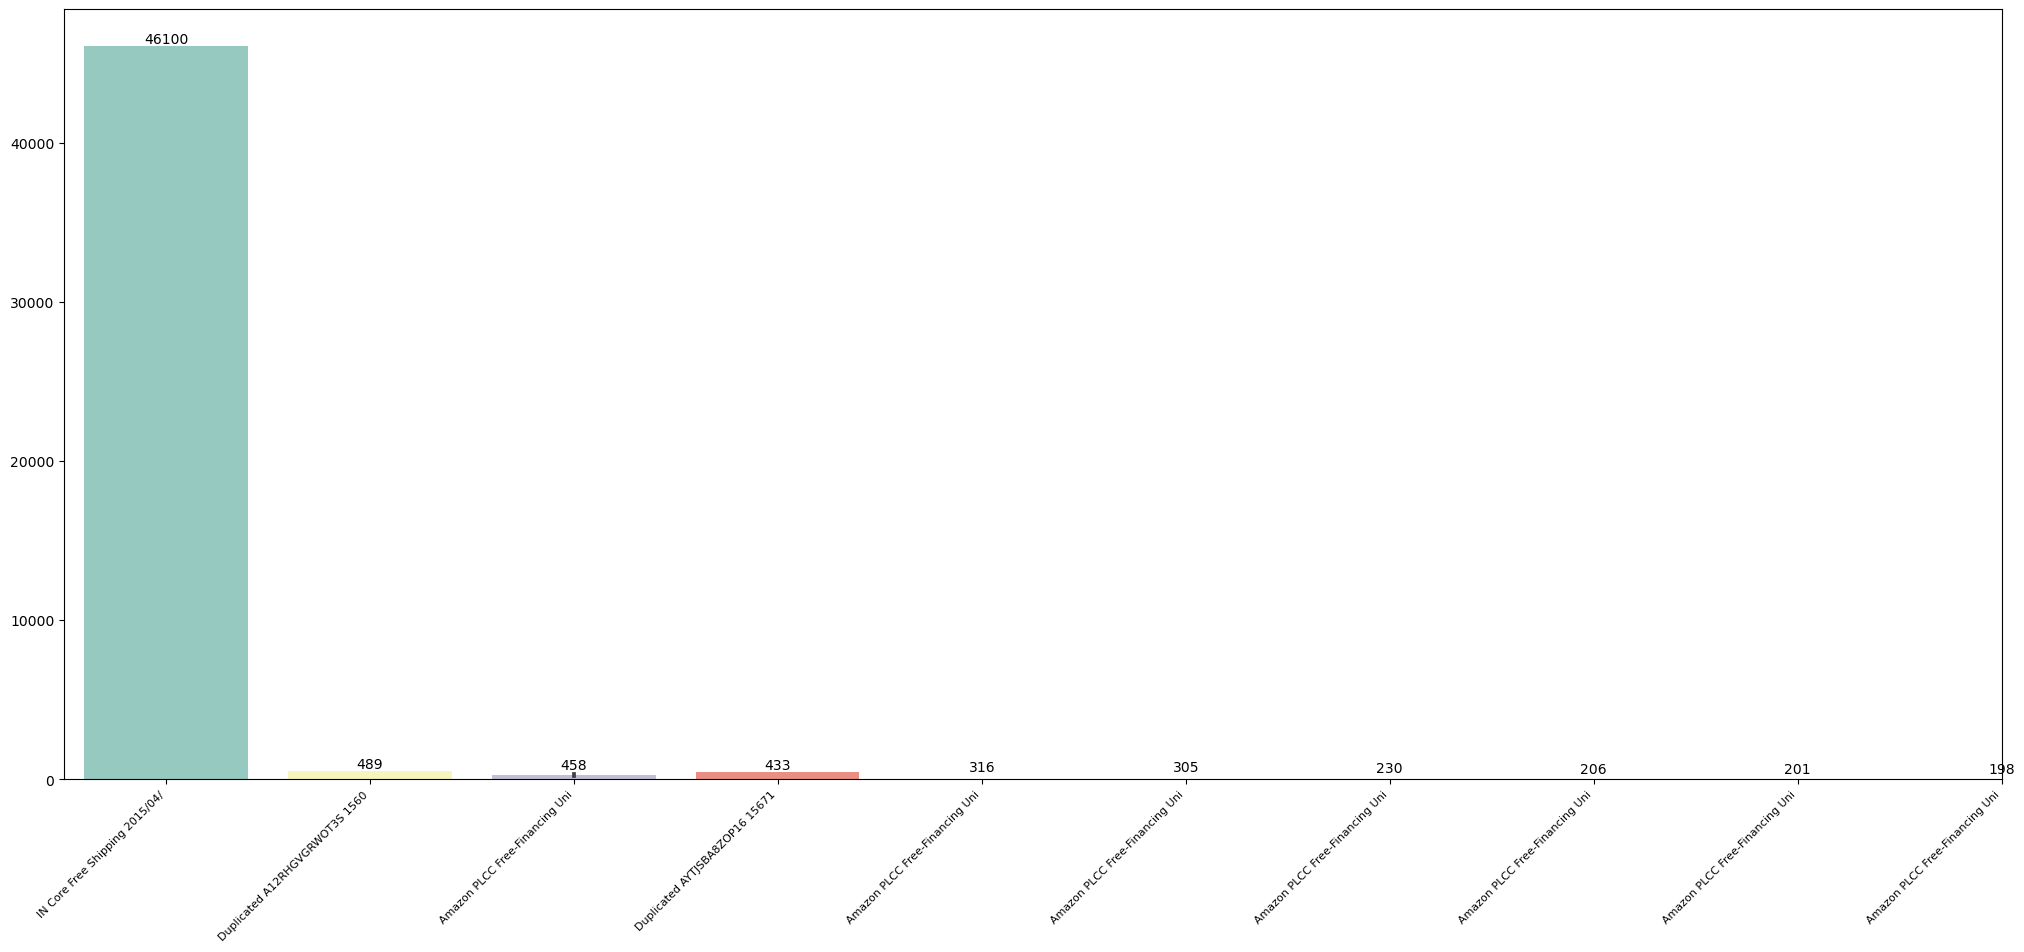

In [73]:
with_prom= df[df['Promotions'] !='No Promotion']
aq = with_prom['Promotions'].value_counts().head(10)

shortened_labels = [label[:30] for label in aq.index]


plt.figure(figsize=(25, 10))
ax = sns.barplot(data=df, x=shortened_labels, y=aq.values)


ax.set_xticks(range(len(shortened_labels)))
ax.set_xticklabels(shortened_labels, fontsize=8, rotation=45, ha='right')
for i, v in enumerate(aq.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)


plt.show()

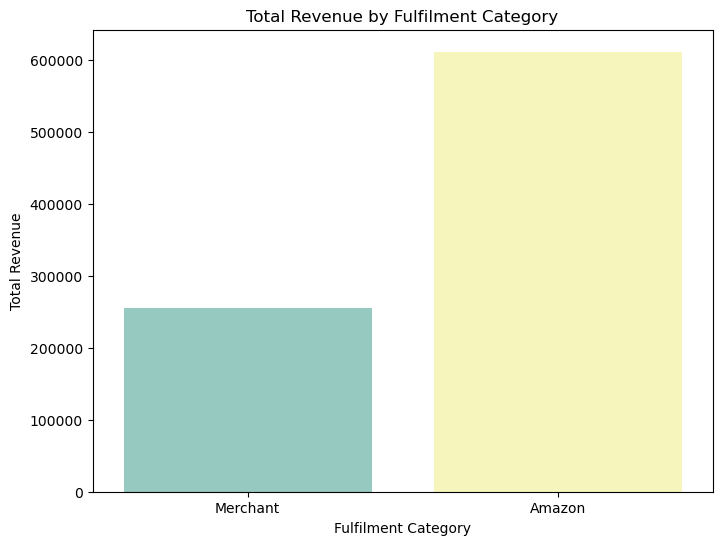

In [88]:
# Calculate the total revenue for each category
total_revenue_mer = df_mer['Revenue'].sum()
total_revenue_no_mer = df_no_mer['Revenue'].sum()
categories = ['Merchant', 'Amazon']
revenues = [total_revenue_mer, total_revenue_no_mer]
data = pd.DataFrame({'Category': categories, 'Total Revenue': revenues})


plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Total Revenue', data=data)
plt.title('Total Revenue by Fulfilment Category')
plt.xlabel('Fulfilment Category')
plt.ylabel('Total Revenue')
plt.show()

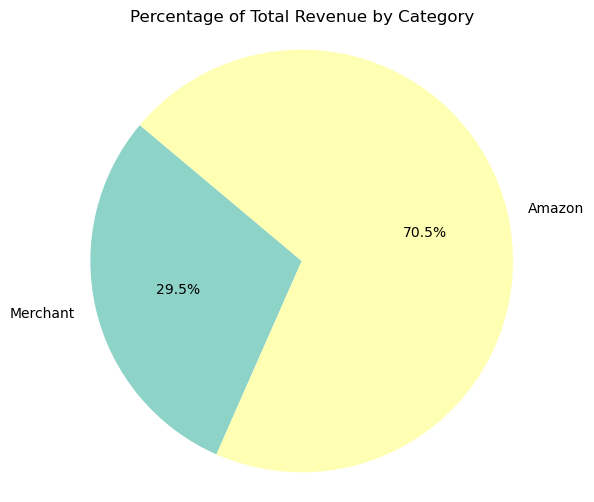

In [144]:
total_revenue_mer = df_mer['Revenue'].sum()
total_revenue_no_mer = df_no_mer['Revenue'].sum()
total_revenue = total_revenue_mer + total_revenue_no_mer


percentage_mer = (total_revenue_mer / total_revenue) * 100
percentage_no_mer = (total_revenue_no_mer / total_revenue) * 100


labels = ['Merchant', 'Amazon']


sizes = [percentage_mer, percentage_no_mer]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Percentage of Total Revenue by Category')
plt.show()
